# Stacked Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
def one_hot(x):
    a = [0]*10
    a[x]=1
    return a

In [4]:

with np.load('mnist.npz') as data:
    train_examples = data['x_train'].reshape(-1,784)
    train_labels = list(map(one_hot,data['y_train']))
    test_examples = data['x_test'].reshape(-1,784)
    test_labels = list(map(one_hot,data['y_test']))
print(train_examples.shape)

(60000, 784)


In [5]:
tf.reset_default_graph() 

## Parameters

In [6]:
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs

learning_rate = 0.01

In [21]:
(784-196)/784

0.75

** Activation function **

In [7]:
actf = tf.nn.relu

### Placeholder

In [8]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Weights

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [9]:
initializer = tf.variance_scaling_initializer()

In [10]:
w1 = tf.Variable(
    initializer(
        [num_inputs, neurons_hid1]), 
        dtype=tf.float32)

w2 = tf.Variable(
    initializer(
        [neurons_hid1, neurons_hid2]),
    dtype=tf.float32)

w3 = tf.Variable(
    initializer(
        [neurons_hid2, neurons_hid3]),
    dtype=tf.float32)
w4 = tf.Variable(
    initializer(
        [neurons_hid3, num_outputs]),
    dtype=tf.float32)

### Biases

In [11]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Activation Function and Layers

In [12]:
act_func = tf.nn.relu

In [13]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

### Loss Function

In [14]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

In [15]:
#tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

In [16]:
train = optimizer.minimize(loss)

### Intialize Variables

In [17]:
init = tf.global_variables_initializer()

In [18]:
saver = tf.train.Saver() 

In [ ]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = train_examples.shape[0]//batch_size
        
        # 150 batch size
        for iteration in range(num_batches):
#           
            X_batch = train_examples[
                iteration*batch_size:(iteration+1)*batch_size]
#             y_batch = train_labels[
#                 iteration*batch_size:(iteration+1)*batch_size]
            sess.run(train,
                     feed_dict={X: X_batch})
            
        training_loss = loss.eval(feed_dict={X: X_batch})   
        
        print("Epoch {} Complete. Training Loss: {}".format(
            epoch,training_loss))
     
    saver.save(sess, "./stacked_autoencoder.ckpt")      

## Test Autoencoder output on Test Data

In [19]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_layer.eval(
        feed_dict={X:test_examples[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


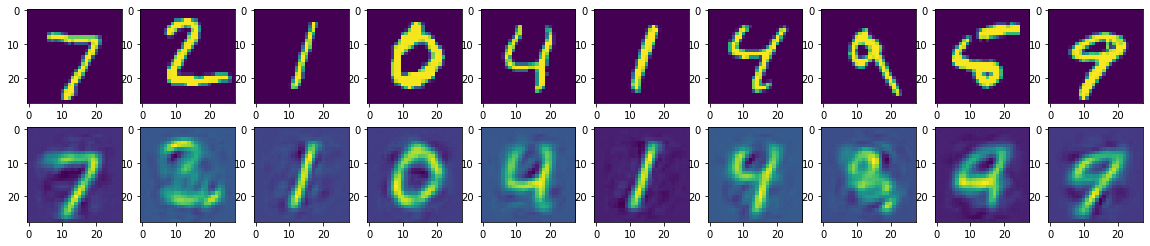

In [20]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(test_examples[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))